# Neural Networks with Tensorflow

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import numpy as np
import tensorflow as tf
from time import time
from IPython.display import Image
import math
from tensorflow.examples.tutorials.mnist import input_data
import functools
import os
from addutils import css_notebook
css_notebook()

In [3]:
import bokeh.plotting as bk
from bokeh.io import push_notebook
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
bk.output_notebook()

Loading BokehJS ...

## 1 Neural Networks

### 1.1 Neural Network Basics

What is a neuron?

A brain neuron has a structure formed by a cell body, an axon were it sends messages to other neuron and dendritic tree were it receives messages from other neuron. A neuron generates outgoing charge (throughout the axon) whenever enough charge has been received (activation).

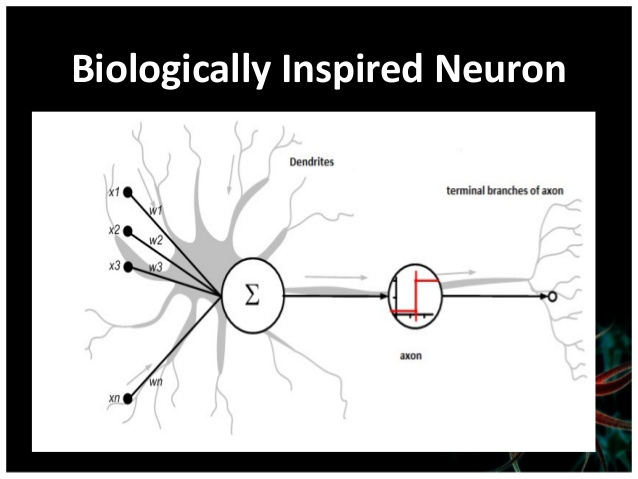

In [4]:
Image('images/neuron.jpeg', width=400, height=400)

In neural networks we use an approximation of neurons that look like this:

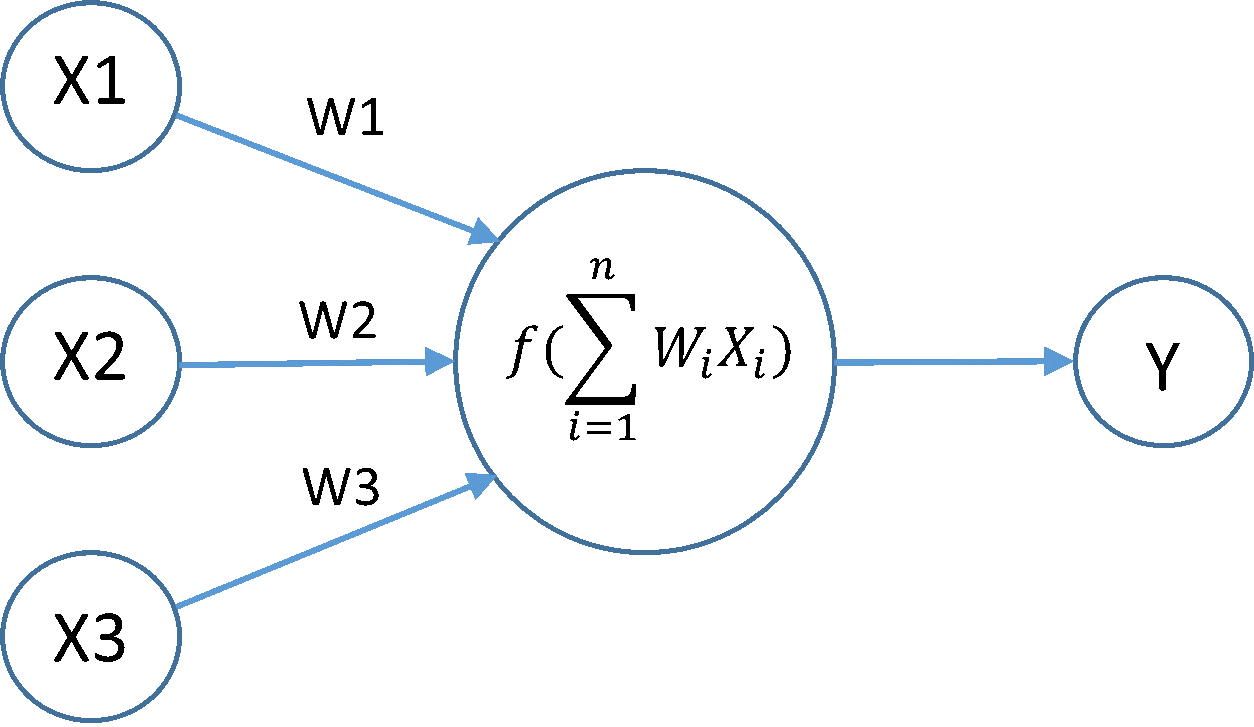

In [5]:
Image('images/Simple Neural Network.png',  width=500, height=500)

In practice they learn how to approximate functions. For example, for a classifier, it maps an input to a category $y = f(X)$. They are called networks because they combine many function together. The graph depicts how the function are composed in layers. Each function in the most basic form combines the input with a series of weights. Think about the most basic linear regression $y = W^TX+b$. $w$ is called the **weights matrix** (if we are in higher dimensions) and $b$ is the **bias vector**. If we think about the neurons of the brain are activated by a stimuli, it is not suprising that an **activation function** can be applyed to the linear combination of weights, biases and inputs. 

One example of activation function is the sigmoid that we have seen in the previous notebook.

In real life, neurons are much more complex than this, and there are many types of neural networks. So the analogy with the brain stops here. 

### 1.2 Architecture of Neural Networks

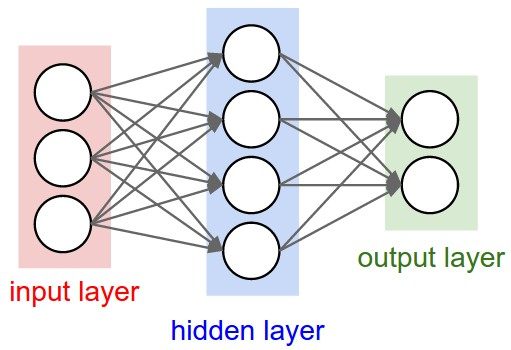

In [6]:
Image('images/neural_net.jpeg')

To define the number of layers in a network we count the number of layers that have weigths. This is a two layer network, that has one hidden layer.

The reason we use layers is that allows us to implement computation more efficiently, with matrix multiplication.

The result of all linear combinations and activation functions gives the output, and to quantify how the Neural Network is performing we define a **cost function** $C$. We have already seen two loss functions, MSE and Cross Entropy. In next section we will use MSE to understand how backpropagation work.

### 1.4 Backpropagation

#### 1.4.1 Gradient Descent

Learning in this contex reduces to finding the best weights and biases that allow the neural network to approximate the function, that is to have a small cost for all training inputs $X$. 

For the moment we will use the MSE as the cost function, but the same reasoning can be applyed to all type of cost functions. 
$$
C(W,b) = \frac{1}{2n}\sum_x \|y-f(X)\|^2
$$
Here $W$ and $b$ denotes all the weights and biases in the network, $n$ is the number of training samples in the data and $f(X)$ is the result of applying the forward pass of the network with input $X$. 

We see that $C(W,b)$ is non-negative, since every term in the sum is non-negative, furthermore, the cost becomes small, when $f(X)$ is approximately equal to the target, for all training inputs. By contrast it is not performing well when $C(W,b)$ is large, that is $f(X)$ is not close to the target for a large number of inputs. The purpose of  the training algorithm is to minimize the cost $C(W,b)$ as a function of the weights and biases. The algorithm that precisely does this is called **gradient descent**.

Quadratic cost works well in this settings, because it is a smooth function, that is making small changes to the weights and biases changes the output accordingly. That makes easy to figure out the amount of change to apply to weights and biases. 

This is a well posed problem but at the moment we are ignoring all the structure of the network, the activation function, weights and biases and so on. It turns out that we can understand a tremendous amount by ignoring most of that structure, and just concentrating on the minimization aspect. So for now we're going to forget all about the specific form of the cost function, the connection to neural networks, and so on. Instead, we're going to minimize some function, $C(v)$. This could be any real-valued function of many variables, $v=v1,v2,\ldots$. It could help to imagine $C$ as a function of just two variables: $v1$ and $v2$:

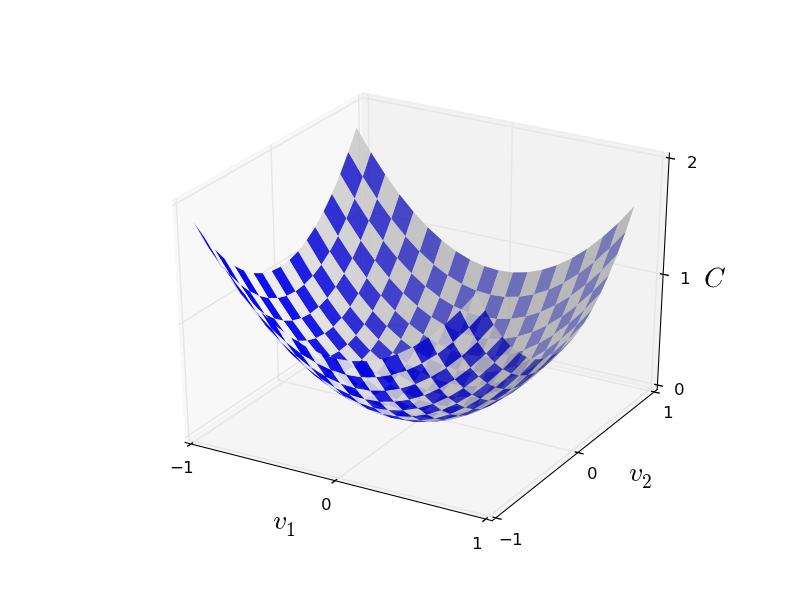

In [7]:
Image('images/valley.png',  width=500, height=500)

The objective of our algorithm is to find where $C$ achieves its global minimum. In this simple context it is easy, but in Neural Networks $C$ can be a complicated function of many variables. 

One way to solve the problem is to use calculus to try to find the minimum analytically, by computing derivatives and using them to find places where C is an extremum. This approach can be feasible when the function is of just two variables but it can be really hard when the function is composed of many variables (like that of Neural Networks), so using calculus in this case simply won't work.

Luckily gradient descent doesn't require calculus and works pretty well in this context. If we think of our function as a kind of a valley and we imagine a ball rolling down the slope of the valley, the ball will eventually roll to the bottom of the valley. How can we use this analogy to devise a method for finding the minimum of $C$? Let's think about what happens when we move the ball a small amount $\Delta v_1$ in the $v_1$ direction, and a small amount $\Delta v_2$ in the $v_2$ direction. $C$ changes as follows: 

$$\Delta C \approx \frac{\partial C}{\partial v_1} \Delta v_1 + \frac{\partial C}{\partial v_2} \Delta v_2.$$

We're going to find a way of choosing $\Delta v_1$ and $\Delta v_2$ so as to make $\Delta C$ negative, so the ball is rolling down into the valley. 

To figure out how to make such a choice it helps to define $\Delta v$ to be the vector of changes in $\Delta v \equiv (\Delta v_1, \Delta v_2)^T$. We'll also define the gradient of $C$ to be the vector of partial derivatives

$$
  \nabla C \equiv \left( \frac{\partial C}{\partial v_1}, 
  \frac{\partial C}{\partial v_2} \right)^T
$$

With these definitions, the expression for $\Delta C$ can be rewritten as $\Delta C \approx \nabla C \cdot \Delta v$, $\Delta C$ relates changes in $v$ to changes in $C$ and it lets us see how to choose $\Delta v$ so as to make $\Delta C$ negative. In particular, suppose we choose 

$$
  \Delta v = -\eta \nabla C
$$

then $\Delta C \approx -\eta \nabla C \cdot \nabla C = -\eta \|\nabla C\|^2$. Because $\|\nabla C\|^2 > 0$, this guarantees that C will always decrease, never increase, if we change $v$ according to equation above. That is exactly what we wanted (but of course remeber that is an approximation). We'll then use this equation to compute a value for $\Delta v$, then move the ball's position $v$ by that amount:

$$
  v \rightarrow v' = v -\eta \nabla C.
$$

Then we'll use this update rule again, to make another move. If we keep doing this, over and over, we'll keep decreasing C until - we hope - we reach a global minimum.

Summing up, the way the gradient descent algorithm works is to repeatedly compute the gradient $\nabla C$, and then to move in the opposite direction, "falling down" the slope of the valley. We can visualize it like this:

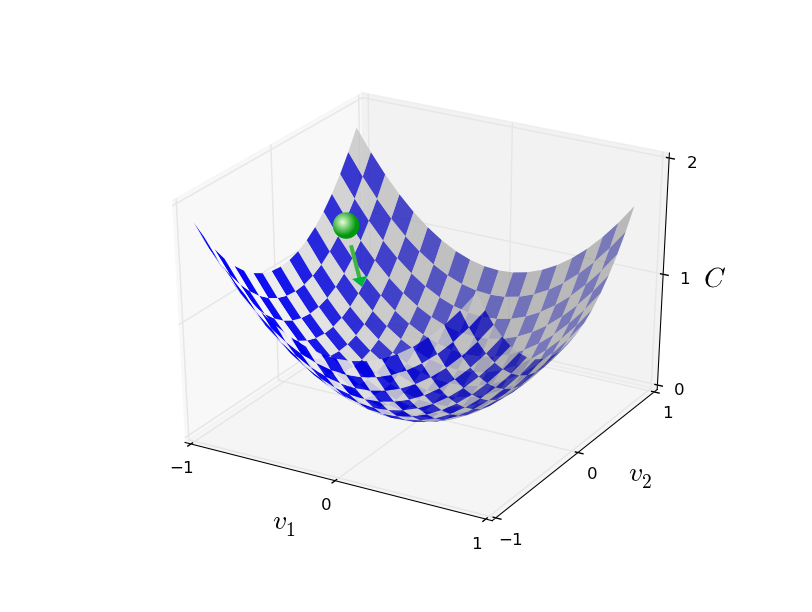

In [8]:
Image('images/valley_with_ball.png',  width=500, height=500)

To make gradient descent work correctly, we need to choose the learning rate $\eta$ to be small enough that equation $\Delta C \approx \nabla C \cdot \Delta v$ is a good approximation. In practice a lower value of $\eta$ will make small changes in $\Delta v$, while an higher value could even end us up in a worse position $\Delta C > 0$. Setting the right value of $\eta$ is tricky and in certain situations can vary over time. 

You can think of this update rule as defining the gradient descent algorithm. It gives us a way of repeatedly changing the position $v$ in order to find a minimum of the function $C$. 

How can we apply gradient descent to learn in a neural network? Position $v$ now has components $w_k$ and $b_l$, and the gradient vector $\nabla C$ has corresponding components $\partial C / \partial w_k$ and $\partial C/ \partial b_l$. Writing out the gradient descent update rule in terms of components, we have:

$$
\begin{eqnarray}
  w_k & \rightarrow & w_k' = w_k-\eta \frac{\partial C}{\partial w_k} \\
  b_l & \rightarrow & b_l' = b_l-\eta \frac{\partial C}{\partial b_l}
\end{eqnarray}
$$

By repeatedly applying this update rule we can "roll down the hill", and hopefully find a minimum of the cost function. In other words, this is a rule which can be used to learn in a neural network.

Notice that the MSE cost function has the form $C = \frac{1}{n} \sum_x C_x$, that is, it's an average over costs $C_x \equiv \frac{\|y - f(x)\|^2}{2}$ for individual training examples. In practice, to compute the gradient $\nabla C$ we need to compute the gradients $\nabla C_x$ separately for each training input, x, and then average them, $\nabla C = \frac{1}{n}
\sum_x \nabla C_x$.

#### 1.4.2 Backpropagation

In previous section we talked about gradient descent,but so far we applyed it (in previous notebook to a simple case where the parameters to optimize where only one weight vector and a bias term. What happens in a more complicated setting, for example that of a neural network? How does gradient descent work in this setting? 

To train a Neural Network in practice we use an algorithm called **backpropagation** that calculate the exact contribute of each weight of the network (that is its gradient) to the final output and update each weight (and bias) accordingly. 

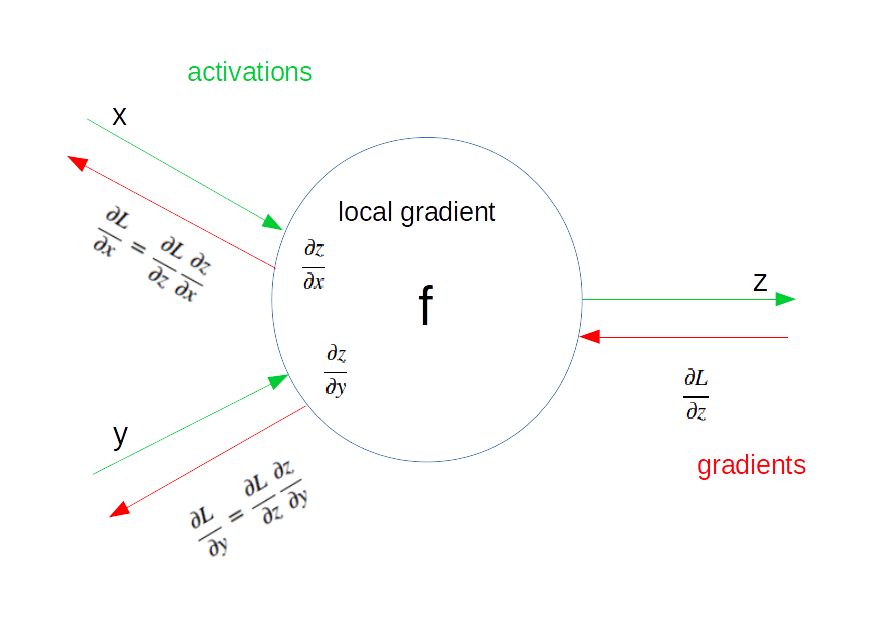

In [9]:
Image('images/gradients.png',  width=500, height=500)

This is a neuron in a computational graph of a Neural Network. Suppose we are calculating the output given a particular set of inputs $x$ and $y$. The output $z$ is passed **forward** until it reaches the output and the loss is calculated. Now we need a way to propagate the error **backward** until we can find the gradient for $x$ and $y$. Suppose that we have already the partial derivative of $z$ w.r.t. the loss $L$. What is the partial derivative of $x$ w.r.t. to $L$? Well it depdends on $f$ for sure, but since it is a composite function we can decompose its derivative with the **chain rule** that is 

$$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \frac{\partial z}{\partial x}$$

The important thing to notice is that the local derivatives $\frac{\partial z}{\partial x}$ and $\frac{\partial z}{\partial y}$ can be computed right away when we recive the inputs $x$ and $y$. Then the whole process can be repeated recursively.

Then when we have all the gradients calcluated for the whole graph we can update the weights. Tensorflow does that automatically, because it knows how to compute the derivative of $f$ for each function that can be used as activation!

Remeber that $x$ and $y$ in neural networks are tensors and weights are matrices.

#### 1.4.3 Optimization functions

When the number of training inputs is very large gradient descent can take a long time, and learning thus occurs slowly.

An idea called **stochastic gradient descent** can be used to speed up learning. The idea is to estimate the gradient by computing them for a small sample of randomly chosen training inputs. By averaging over this small sample it turns out that we can quickly get a good estimate of the true gradient, and this helps speed up gradient descent, and thus learning.

To make these ideas more precise, stochastic gradient descent works by randomly picking out a small number m of randomly chosen training inputs. We refer to them as a **mini-batch**. Provided the sample size is large enough we expect that the average value of the gradient will be roughly equal to the average overall.

There are many optimization functions, most of them tries to improve simple stochastic gradient descent by adding momentum or other *derived* function, in order to reach (local) minima quickly or to overcome being stuck too early in bad local minima.

We introduced all base operations of TensorFlow in previous notebook, now we talk further about optimization operators and how they are used. For example we used optimization at the end of previous notebook to classify digits:

```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
_, l = sess.run([optimizer, loss], feed_dict={x: x_batch, y:y_batch})
```

In a session the optimizer operation looks at all **trainable** variables that cost depends on and update them.

```python
tf.Variable(initial_value=None, trainable=True, ...)
```

Specify if a variable should be trained or not. By default, all variables are trainable. For example the global step of the training procedure should not be trained or some layer of the network could be freezed (a technique we will use in later notebooks).


There are many available optimizers in TensorFlow: 
- tf.train.GradientDescentOptimizer
- tf.train.AdagradOptimizer
- tf.train.MomentumOptimizer
- tf.train.AdamOptimizer
- tf.train.RMSPropOptimizer

### 1.4 Activation functions

There are many activation functions, perhaps two of the most popular ad the sigmoid function: 
$$
\sigma(x) = \frac{1}{1+e^{-z}}
$$

and the hyperbolic tangent: 

$$
tanh(x)
$$

Recently (2012) another activation function has become quite popular, Rectifier Linear Unit (ReLU): 

$$
max(0, x)
$$

and it is the current default choice in many modern network architectures.

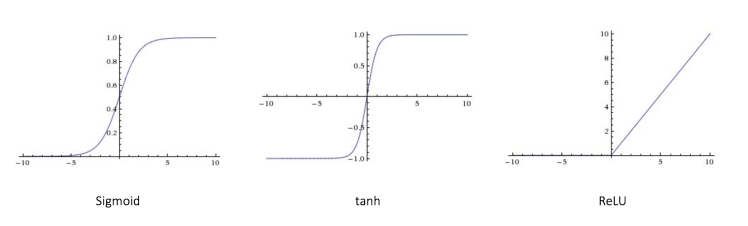

In [10]:
Image('images/activation_functions.png',  width=800, height=800)

### 1.5 Additional Resources

* [TensorFlow playground](http://playground.tensorflow.org/)
* [TensorFlow examples](https://github.com/aymericdamien/TensorFlow-Examples)
* [Colah's Blog](http://colah.github.io/)
* [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com)
* [distill.pub](https://distill.pub/)

## 2 Classification with a Multi Layer Perceptron

### 2.1 The Data

In [11]:
mnist = input_data.read_data_sets('example_data/MNIST_data', one_hot=True)

Extracting example_data/MNIST_data/train-images-idx3-ubyte.gz
Extracting example_data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting example_data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting example_data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
# The MNIST dataset has 10 classes, representing the digits 0 through 9.
NUM_CLASSES = 10

# The MNIST images are always 28x28 pixels.
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE

### 2.2 The Network

Now we will build the network step-by-step, we will discuss its (simple) architecture and how to built it with TensorFlow.

Our simple MLP looks like this: input -> hidden layer -> output classification

Defining a `tf.placeholder` with `None` as its first dimension indicates that the first dimension, corresponding to the batch size, can be any size. These placeholder will contain input images and labels and will be fed to the program during the training phase.

In [13]:
image_placeholder = tf.placeholder(tf.float32, shape=[None, IMAGE_PIXELS])
label_placeholder = tf.placeholder(tf.int32, shape=[None, NUM_CLASSES])

In order to provide a dictionary when feeding the placeholder, we use a small helper function.

In [14]:
def get_feed_dict(batch, place_1, place_2):
    return {place_1: batch[0], place_2: batch[1]}

The hidden layer has a number of units that can be specified with the parameter `hidden1_units` and it computes a transformation of the linear combination of inputs, weights and biases. There are a lot of transformation available in TensorFlow, but for this example we will use ReLU.

The weight matrix is initialized to random values, while the bias vector is initialized to a costant values (a smallquantity, it can be zero); it is also good practice to initialize weights of a ReLU with a slightly positive initial bias to avoid "dead neurons". A reasonable-sounding idea then might be to set all the initial weights to zero, which we expect to be the "best guess" in expectation. This turns out to be a mistake, because if every neuron in the network computes the same output, then they will also all compute the same gradients during backpropagation and undergo the exact same parameter updates. In other words, there is no source of asymmetry between neurons if their weights are initialized to be the same. It is possible and common to initialize the biases to be zero, since the asymmetry breaking is provided by the small random numbers in the weights

In [15]:
hidden1_units = 32

with tf.name_scope('hidden1'):
    weights = tf.Variable(
        tf.truncated_normal([IMAGE_PIXELS, hidden1_units], 
                            stddev=0.1 / math.sqrt(float(IMAGE_PIXELS))),
        name='weights')
    biases = tf.Variable(tf.zeros([hidden1_units]),
                         name='biases')

    hidden1 = tf.nn.relu(tf.matmul(image_placeholder, weights) + biases)

Note the use of `tf.name_scope` to define a prefix to the variables. 

The last stage compute a **softmax** transformation of the hidden layer. 

In [16]:
with tf.name_scope('softmax_linear'):
    weights = tf.Variable(
        tf.truncated_normal([hidden1_units, NUM_CLASSES],
                            stddev=1.0 / math.sqrt(float(hidden1_units))),
        name='weights')
    biases = tf.Variable(tf.zeros([NUM_CLASSES]),
                         name='biases')
    logits = tf.matmul(hidden1, weights) + biases

Now it is possible to use TensorFlow automatic differentiation to find the gradients of the cost with respect to each variable. For this example we use basic steepest gradient descent as optimizer.  **Gradient Descent** is a simple procedure, where TensorFlow simply shifts each variable a little bit in the direction that reduces the cost. This *little bit* is the **learning rate** and it is multiplied by the negative of the gradient. For this examples the learning rate is fixed at 0.05. Actually we are using **Stochastic Gradient Descent**. Stochastic means that we are not using all the data to perform a single update of the weights but we are using a subsample at a time. This subsample is called **mini batch** and it is random. Each time we exahaust the training set we can recompute another subsample and so on. Each iteration (that is each time the algorithm consumes all the dataset) is an epoch. At each epoch the function gets better.

Next we define the cost function, cross entropy in this case. 

In [17]:
learning_rate = 0.01
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=label_placeholder,
                                                           name='xentropy')
loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

To evaluate the model we first compute the position of the maximum entry in both predicted and real output. This corresponds to the class to which the example belongs. Then we compare the two vector to determine what fraction of the predicted output is correct.

In [18]:
correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(logits),1), 
                              tf.argmax(label_placeholder,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

After we constructed the graph, we need to start a session to run it. 

In [19]:
sess = tf.Session()

Next thing to do is to initialize the variable in the session.

In [20]:
sess.run(tf.global_variables_initializer())

Ok, now we are ready to launch the training:

In [21]:
MAX_STEPS = 5000
BATCH_SIZE = 128

for i in range(MAX_STEPS):
    feed_dict = get_feed_dict(mnist.train.next_batch(BATCH_SIZE), 
                              image_placeholder, 
                              label_placeholder)
    _ = sess.run(train_op, feed_dict=feed_dict)
    if (i+1) % 500 == 0:  
        feed_dict = get_feed_dict(mnist.validation.next_batch(BATCH_SIZE), 
                                  image_placeholder, 
                                  label_placeholder)
        acc = sess.run(accuracy, feed_dict=feed_dict)
        print('Accuracy at step %s: %s' % (i+1, acc))

Accuracy at step 500: 0.828125
Accuracy at step 1000: 0.8515625
Accuracy at step 1500: 0.9140625
Accuracy at step 2000: 0.875
Accuracy at step 2500: 0.8984375
Accuracy at step 3000: 0.9453125
Accuracy at step 3500: 0.9453125
Accuracy at step 4000: 0.9453125
Accuracy at step 4500: 0.9375
Accuracy at step 5000: 0.9140625


**REMARK** Epochs are calculated directly by the mnist object. Whenever the number of batches requested is greather than the number of examples it automatically updates the number of epochs. The object shuffles also the training set for better learning.

In [22]:
print(accuracy.eval(session=sess, feed_dict={image_placeholder: mnist.test.images, 
                                             label_placeholder: mnist.test.labels}))

0.9153


In [23]:
sess.close()

## 3 Structure and Logging

### 3.1 Managing experiments

#### 3.1.1 Saving and Restoring Model Variables

A good practice is to periodically save the model’s parameters after a certain number of steps so that we can restore/retrain our model from that step if need be. The `tf.train.Saver()` class allows us to do so by saving the graph’s variables in binary files. It does not save the graph! This class has basically two methods: `tf.train.Saver.save(sess, save_path, global_step=...)`:

>This method runs the ops added by the constructor for saving variables.
It requires a session in which the graph was launched.  The variables to
save must also have been initialized.

and `tf.train.Saver.restore(sess, save_path)`:

>This method runs the ops added by the constructor for restoring variables.
It requires a session in which the graph was launched.  The variables to
restore do not have to have been initialized, as restoring is itself a way
to initialize variables.

It is good practice to save parameters every $n$ number of steps.

```python
saver = tf.train.Saver()

with tf.Session() as sess:
    for step in range(training_steps): 
        sess.run([optimizer])
        
        if (step + 1) % 1000 == 0:
            saver.save(sess, 
            'checkpoint_directory/model_name',
            global_step=step)
```

In TensorFlow lingo, the step at which you save your graph’s variables is called a checkpoint. Since we will be creating many checkpoints, it’s helpful to append the number of training steps our model has gone through in a variable called global_step. It’s a very common variable to see in TensorFlow program. We first need to create it, initialize it to 0 and set it to be not trainable, since we don’t want to TensorFlow to optimize it.

```python
global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')
optimizer = tf.train.AdamOptimizer(lr).minimize(loss, global_step=global_step)
```

It is needed to tell optimizer to increment global step. This can also help your optimizer know when to decay learning rate

To restore the model from a specific checkpoint: 

```python
saver.restore(sess, 'checkpoints/name_of_the_checkpoint')
```

Note that you still need to construct the graph first. It is also possible to automatically restore the latest checkpoint: 

```python
ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoints/checkpoint'))

if ckpt and ckpt.model_checkpoint_path:
     saver.restore(sess, ckpt.model_checkpoint_path)
```
Checkpoint file keeps track of the latest checkpoint, restore checkpoints only when there is a valid checkpoint path.

#### 3.1.2 Log useful information with `tf.summary`

In order to visualize summary statistics during training, tensorflow has several operations:
 - tf.summary.scalar
 - tf.summary.histogram
 - tf.summary.image
 
First you need to create the summaries:
```python
with tf.name_scope("summaries"):
    tf.summary.scalar("loss", loss)
    tf.summary.scalar("accuracy", accuracy)            
    tf.summary.histogram("histogram loss", loss)
    summary_op = tf.summary.merge_all()
```
the last operation concentrate all summary in a single operation for clarity. Now you can run `summary_op` during training in a session like any other operation. Remember to write the summaries to file with a file writer. Remember to add a global step variable so the model knows what summary corresponds to what step. In the next section we will see all this in action!

### 3.2 Model structuring

**TRANSLATE**: Un modo per strutturare i modelli è quello di usare shared variables. Un'altro modo è incapsulare i modelli in oggetti. Abbiamo già visto come condividere le variabili, adesso vediamo come strutturare usare gli oggetti. 

In [24]:
def lazy_property(function):
    attribute = '_lazy_' + function.__name__
    
    @property
    @functools.wraps(function)
    def wrapper(self):
        if not hasattr(self, attribute):
            setattr(self, attribute, function(self))
        return getattr(self, attribute)
    return wrapper

In [25]:
class MLP:
    def __init__(self,
                 layers,
                 input_dim,
                 output_dim,
                 learning_rate,
                 batch_size=128, 
                 base_dir='temp/mnist_fc', 
                 run_dir='0'):
        self.mnist = input_data.read_data_sets('example_data/MNIST_data')
        self.x = tf.placeholder(tf.float32, shape=[None, input_dim])
        self.y = tf.placeholder(tf.int64, shape=[None])
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.layers = layers
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.base_dir = base_dir
        self.run_dir = run_dir
        self.prediction
        self.optimize
        self.accuracy
        self.saver = tf.train.Saver()
        self.sess = tf.Session()
        self.merged = tf.summary.merge_all()
        self.train_writer = tf.summary.FileWriter(os.path.join(base_dir, run_dir, 'train'),
                                                  self.sess.graph)
        self.test_writer = tf.summary.FileWriter(os.path.join(base_dir, run_dir, 'test'))
        self.sess.run(tf.global_variables_initializer())

    @lazy_property
    def prediction(self):
        return tf.nn.softmax(self.forward)

    @lazy_property
    def forward(self):
        layer = self.x
        res = [self.input_dim] + self.layers
        for i, (input_dim, output_dim) in enumerate(zip(res[:-1], res[1:])):
            layer = self._nn_layer(layer, input_dim, output_dim, 'layer'+str(i))
        y = self._nn_layer(layer,
                           self.layers[-1],
                           self.output_dim,
                           'output_layer',
                           act=tf.identity)
        return y
    
    @lazy_property
    def cost(self):
        with tf.name_scope('cross_entropy'):
            cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=self.y,
                                                                   logits=self.forward)
        tf.summary.scalar('cross_entropy', cross_entropy)
        return cross_entropy

    @lazy_property
    def optimize(self):
        with tf.name_scope('train'):
            train_step = tf.train.AdamOptimizer(self.learning_rate).minimize(self.cost)
        return train_step

    @lazy_property
    def accuracy(self):
        with tf.name_scope('accuracy'):
            correct_prediction = tf.equal(tf.argmax(self.prediction, 1), self.y)
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        tf.summary.scalar('accuracy', accuracy)
        return accuracy

    def close(self):
        self.sess.close()
    
    def feed_dict(self, dataset):
        """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
        if dataset=='train':
            xs, ys = self.mnist.train.next_batch(self.batch_size)
        elif dataset=='test':
            xs, ys = self.mnist.test.images, self.mnist.test.labels
        elif dataset=='validation':
            xs, ys = self.mnist.validation.images, self.mnist.validation.labels
        return {self.x: xs, self.y: ys}
    
    @staticmethod
    def variable_summaries(var):
        """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
        with tf.name_scope('summaries'):
            mean = tf.reduce_mean(var)
            tf.summary.scalar('mean', mean)
            with tf.name_scope('stddev'):
                stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('stddev', stddev)
            tf.summary.scalar('max', tf.reduce_max(var))
            tf.summary.scalar('min', tf.reduce_min(var))
            tf.summary.histogram('histogram', var)

    @staticmethod
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.1)
        return tf.Variable(initial)

    @staticmethod
    def bias_variable(shape):
        initial = tf.constant(0.1, shape=shape)
        return tf.Variable(initial)

    def _nn_layer(self,
                 input_tensor,
                 input_dim,
                 output_dim,
                 layer_name,
                 act=tf.nn.relu):
        """Reusable code for making a simple neural net layer.

        It does a matrix multiply, bias add, and then uses relu to nonlinearize.
        It also sets up name scoping so that the resultant graph is easy to read,
        and adds a number of summary ops.
        """
        # Adding a name scope ensures logical grouping of the layers in the graph.
        with tf.name_scope(layer_name):
            # This Variable will hold the state of the weights for the layer
            with tf.name_scope('weights'):
                weights = self.weight_variable([input_dim, output_dim])
                self.variable_summaries(weights)
            with tf.name_scope('biases'):
                biases = self.bias_variable([output_dim])
                self.variable_summaries(biases)
            with tf.name_scope('Wx_plus_b'):
                preactivate = tf.matmul(input_tensor, weights) + biases
                tf.summary.histogram('pre_activations', preactivate)
            activations = act(preactivate, name='activation')
            tf.summary.histogram('activations', activations)
            return activations

    def fit(self, steps):
        for i in range(steps):
            if i % 10 == 0:  # Record summaries and test-set accuracy
                summary, acc = self.sess.run([self.merged, self.accuracy],
                                             feed_dict=self.feed_dict('test'))
                self.test_writer.add_summary(summary, i)
                if i % 100 == 0:
                    print('Accuracy at step %s: %s' % (i, acc))
            else:  # Record train set summaries, and train
                if i % 100 == 99:  # Record execution stats
                    run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
                    run_metadata = tf.RunMetadata()
                    summary, _ = self.sess.run([self.merged, self.optimize],
                                               feed_dict=self.feed_dict('train'),
                                               options=run_options,
                                               run_metadata=run_metadata)
                    self.train_writer.add_run_metadata(run_metadata, 'step%d' % i)
                    self.train_writer.add_summary(summary, i)
                    #print('Adding run metadata for', i)
                else:  # Record a summary
                    summary, _ = self.sess.run([self.merged, self.optimize],
                                               feed_dict=self.feed_dict('train'))
                    self.train_writer.add_summary(summary, i)
                    
    def predict(self):
        acc, y_pred = self.sess.run([self.accuracy, self.prediction],
                                    feed_dict=self.feed_dict('validation'))
        return acc, np.argmax(y_pred, 1)

In [26]:
tf.reset_default_graph()
model = MLP([32], IMAGE_PIXELS, NUM_CLASSES, 0.01)
model.fit(1000)
acc, _ = model.predict()
print('Accuracy on validation set: {}'.format(acc))
model.close()

Extracting example_data/MNIST_data/train-images-idx3-ubyte.gz
Extracting example_data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting example_data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting example_data/MNIST_data/t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.1153
Accuracy at step 100: 0.9136
Accuracy at step 200: 0.9244
Accuracy at step 300: 0.9361
Accuracy at step 400: 0.9439
Accuracy at step 500: 0.9458
Accuracy at step 600: 0.9459
Accuracy at step 700: 0.9546
Accuracy at step 800: 0.9458
Accuracy at step 900: 0.952
Accuracy on validation set: 0.9557999968528748


Now it is possible to launch tensorboard with: `tensorboard --logdir=temp/mnist_fc/0`

### 3.3 Considerations on simple MLP models

The performance of the simple MLP is pretty good, but what if we want to improve it? Increasing the number of layers does not improve the accuracy, but why? This is known as the vanishing or exploding gradient problems. That is, the learning procedure based on gradients is unstable if we have many layers, resulting in the last layers to learn slowly. For this reason in order to train deeper network we must use another kind of network, the **Convolutional Neural Network**. In practice to avoid the vanishing gradient problem we use a specialized network with fewer parameters, that takes advantage of spatial locality of the images.

## 4 Simplify TensorFlow

### 4.1: contrib.learn

The module **learn** in the contrib section of the repository of TensorFlow was formerly known as skflow and it is meant to provide ease of use and modularity, for beginners and for integrating TensorFlow models in existing code. It has an interface similar to scikit-learn and it is possible to create a Neural Network with few line of code.

In [27]:
from tensorflow.contrib import learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [28]:
classifier = learn.DNNClassifier(hidden_units=[hidden1_units, 20, 10],
                                 n_classes=NUM_CLASSES,
                                 feature_columns=learn.infer_real_valued_columns_from_input(mnist.train.images.astype(np.float32)),
                                 optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.05)) 

With just one line of code we are able to create the same neural network that took us many line of code to compute, and with just one line we can fit it.

In [29]:
classifier.fit(mnist.train.images, 
               np.argmax(mnist.train.labels, axis=1).astype(np.int64), 
               batch_size=BATCH_SIZE, 
               steps=3000) 

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fbce06ded68>, 'hidden_units': [32, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fbce0746c18>, 'activation_fn': <function relu at 0x7fbce7022048>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

The accuracy is similar to the example above.

In [30]:
accuracy_score = classifier.evaluate(x=mnist.test.images.astype(np.float32), 
                                     y=np.argmax(mnist.test.labels, axis=1).astype(np.int64))["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

Accuracy: 0.952400


Learn has many models, for example it is possible to create a linear classification model or even a Random Forest! It is also possible to create an highly customized model by providing a model function to an `Estimator` object. However if the model is highly complex maybe it is best to use plain TensorFlow.

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.